In [1]:
%matplotlib inline
from IPython import display
import pandas as pd
pd.options.display.max_rows = 9999
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In this exercise, we will use <b>Gaussian Naive Bayes</b> model to classify whether the next day is a rainy day or not.

# Load dataset
- Load the Australia weather dataset (source: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

In [2]:
# load dataset and print data info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

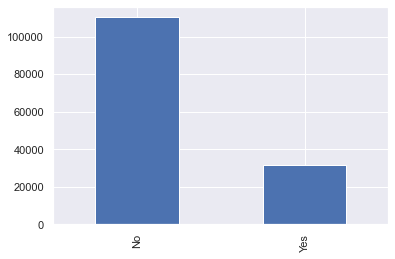

In [3]:
# bar chart showing no. of positive and negative labels


- We can see that there are both numerical and categorical features. Since Gaussian Naive Bayes use normal distribution to estimate likelihood of continuous data, for simplicity we omit categorical data in this example.

# Find all categorical columns

In [4]:
# Convert the target column to numeric for model fitting


In [5]:
# Split date column into year, month and day


In [6]:
# find all columns with categorical data


['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [7]:
# list of columns to consider, keep only RainTommorow in cat_cols which is the target variable


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow',
 'Day',
 'Month',
 'Year']

# Handling missing data

In [8]:
# drop na in target value as we're going to do cross validation


(142193, 26)

In [9]:
# simple imputation strategy
# fill missing values by forward and backward fill group by location for all other values


['Evaporation', 'Sunshine', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']


In [10]:
# some locations miss all Evaporation data


Albury
BadgerysCreek
Newcastle
NorahHead
Penrith
Wollongong
Tuggeranong
MountGinini
Ballarat
Nhil
GoldCoast
Witchcliffe
PearceRAAF
SalmonGums
Walpole
Uluru


In [11]:
# for those still missing it is because some locations missing all data of a feature
# just fill them by 0


# Applying Gaussian Naive Bayes model 
- Apply a 5-fold cross validation of Gaussian Naive Bayes on the dataset
- Check the mean accuracy of cv

In [12]:
# 5-fold cross validation


In [13]:
# mean test score


0.7982111425369309

- Even when omitting 5 categorical columns and simplify the missing values situation, we still get 80% of accuracy using Gaussian Navie Bayes model which is not bad at all.
- Improvements can be made if we consider categorical data: <br><b>One-hot encode</b> categorical data, apply <b>Multinomial Navie Bayes</b> model on one-hot encoding part, and apply Gaussian Naive Bayes model on the continuous part as before, and 'combine' the two predict probability by ways like weighted-average. (https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea)